# Simple and Logarithmic Return

Let's defined and clarify the definitions and usage of simple and logarithmic returns for financial assets like stocks or portfolios.<br>
This notebook is based on Panna Miskolczi's "Note on simple and logarithmic returns" paper. For our purpose, we use the daily stock prices of the bank Goldman Sachs (ticker: GS), Google (ticker: GOOG) and Apple (ticker: AAPL). and for the risk calculation, we focus on the following risk measures:
1. standard deviation
2. semivariance
3. Value at Risk
4. Expected Shortfall

### Simple return
Return is the profit of an investment over a period of time, expressed as a proportion of the original investment. Given $P_0$, the price of an asset at time $0$ and $P_T$, the price of an asset at time $T$. If there is no cash flow in this time $[0,T]$ interval, we therefore speak of a *one-period simple net return* and we introduce the notation $R^S_{[0,T]}[1]$ so that:

$R^S_{[0,T]}[1] = \frac{P_T - P_0}{P_0} = \frac{P_T}{P_0} - 1$

The *one-period gross return* of an asset is given in terms of the simple return:

$GrR^S_{[0,T]}[1] = R^S_{[0,T]}[1] + 1$

Let's devide the interval $[0,T]$ into $n$ **pair wise disjointed intervals** with $t_0 = 0$ and $t_n = T$:

$GrR^S_{[0,T]}[n] = \prod_{i=1}^{n}{GrR^S_{[t_{i-1},t_i]}[1]} = \prod_{i=1}^{n}{(1 + R^S_{[t_{i-1},t_i]}[1])}$

### Logarithmic return
Abbreviated log return. Let's devide the interval $[0,T]$ into $n$ **equidistant intervals** with $t_0 = 0$ and $t_n = T$. We will assume that on every $[t_{i-1}, t_i]$ interval, the subinterval return $R$ is the same as for the $n-1$ other subinterval.

$R = \frac{R^*_{[0,T]}[1]}{n}$ such that:

$GrR^S_{[0,T]}[n] = \prod_{i=1}^{n}{(1 + R^S_{[t_{i-1},t_i]}[1])} = (1+R)^n = (1 + \frac{R^*_{[0,T]}[1]}{n})^n$

Since $t_0$ and $t_n$ are the 0th and the last time points respectively:

$GrR^S_{[0,T]}[n] = \frac{1}{P_0} * \prod_{i=1}^{n-1}{\frac{P_{t_i}}{P_{t_i}}} * P_T = \frac{P_T}{P_0} = (1 + \frac{R^*_{[0,T]}[1]}{n})^n$

Let's make the length of the $n$ $[t_{i-1}, t_i]$ subintervals tend towards 0 such as $n -> +\infty$.

$\lim_{n \to +\infty}{\frac{P_T}{P_0}} = \lim_{n \to +\infty}{(1 + \frac{R^*_{[0,T]}[1]}{n})^n} = e^{R^*_{[0,T]}[1]}$ by the definition of the exponential function.

Since we are interested in returns, we apply the logarithm: $ln(\frac{P_T}{P_0}) = R^*_{[0,T]}[1]$

This is called the one-period logarithmic return of an asset. So we define the one-period log return as the logarithm of the one-period simple gross return and we use the notation $R^L_{[0,T]}[1]$ so that:

$R^L_{[0,T]}[1] = ln(\frac{P_T}{P_0}) = ln(1 + R^S_{[0,T]}[1])$

$R^L_{[0,T]}[1] = ln(\frac{P_{t_1}}{P_{t_0}} * \frac{P_{t_2}}{P_{t_1}} * ... * \frac{P_{t_n}}{P_{t_{n-1}}}) = \sum_{i=1}^{n}{ln(\frac{P_{t_n}}{P_{t_{n-1}}})}$

##### Summary

$R^S_{t} = R^S_{[t, t-1]}[1] = \frac{P_t}{P_{t-1}} - 1$ and $R^S_{t} = e^{R^L_{t}} - 1$

$R^L_t = R^L_{[t, t-1]}[1] = ln(\frac{P_T}{P_{t-1}})$ and $R^L_{t} = ln(1 + R^S_{t})$

## Applying simple and logarithmic returns to portfolios (of assets)

Calculating the simple and logarithmic returns of a portfolio differs due to the rules of sums, leading to diverging effects and results that can be sought after. The following notation is used:

- $n$ : number of assets in the portfolio
- $i$ : reference of an asset in the portfolio
- $S_t$ : amoiunt of money invested in the portfolio at time t
- $S_{t, i}$ : amount of money invested in an asset i at time t
- $P_{t, i}$ : price of asset i at time t
- $W_{t, i}$ : relative weights of the asset i in porfolio at time t
- $k_i$ : number of asset i in portfolio

with: $S_{t, i} = k_i * P_{t,i} = W_{t, i} * S_t$

$S_t = \sum^{n}_{i = 1}{S_{t, i}} = \sum^{n}_{i = 1}{k_i * P_{t, i}}$

$W_{t, i} = \frac{S_{t, i}}{S_{t}} = \frac{k_i * P_{t, i}}{\sum^{n}_{i = 1}{k_i * P_{t, i}}}$ with $\sum^{n}_{i = 1}{W_{t, i}} = 1$

##### Simple return of a portfolio
Similar to the simple return of an asset, we can define the simple return of a portfolio at time $t$ as the gain (or loss) in value of the profolio relative to the starting value:

$R^S_t = \frac{S_t}{S_{t-1}} - 1$

Using the fact that the weights sum up to one and the equation above where is the simple return $R^S_t$ of asset $i$ at time $t$, we can rewrite $S_t$ such as:

$S_t = \sum^{n}_{i = 1}{k_i * P_{t, i}} = \sum^{n}_{i = 1}{k_i * P_{t-1, i} * (1+R^S_t)} = \sum^{n}_{i = 1}{S_{t-1, i} * (1+R^S_t)} = \sum^{n}_{i = 1}{S_{t-1} * W_{t-1,i} * (1+R^S_t)}$

This provides the simple return of a portfolio at time $t$:

$R^S_t = \frac{S_t}{S_{t-1}} - 1 = \sum^{n}_{i=1}{W_{t-1,i}*R^S_{t,i}}$

The portfolio simple return is the sum of the weighted simple returns of the constituents of the considered portfolio.

##### Logarithmic return of a portfolio

The logarithmic return of a porfolio, nioted $R^L_t$ at time $t$ can be defined analogously to the logarithmic return of an asset such as:

$R^L_t = ln(\frac{S_t}{S_{t-1}}) = ln(1 + \sum^{n}_{i=1}{W_{t-1,i}*R^S_{t,i}}) = ln(1 + \sum^{n}_{i=1}{W_{t-1,i}*E^{R^L_{t,i}})}$ where $R^L_{t,i}$ is the log return of asset $i$ at time $t$.

Because of the rules of logarithm, it cannot be written as the sum of the weighted log returns of the constituents of the considered portfolio. 

$R^L_t = ln(1 + R^S_t) \approx R^S_t \approx \sum^{n}_{i=1}{W_{t-1,i}*R^L_{t,i}}$

## Extracting Stock Data

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from scipy.stats import norm

In [2]:
pandas_type = "pandas.core.frame.DataFrame"

The data retrieved using ``yf.download(ticker)`` is a dictionary containing financial information on a company stock such as Goldman Sachs (or GS). Some of those values, such as bid and ask, may drop to 0 outside of market hours. As such, the price used for the following Jupyter is the one linked to the key 'regularMarketPrice'.

In [3]:
def download_stock_data(ticker: str) -> (str, pandas_type):
    """
    Downloads and reshapes stock data based on the yfinance library.
    """
    stock_data = yf.download(ticker)
    columns_to_remove = [col for col in stock_data.columns if col != "Adj Close"] #lists all column not 'Adj Close'
    stock = stock_data.drop(columns = columns_to_remove)
    stock = stock[-260:] #260 is the expected number of business days in 1 year (conventional time frame to compute VaR)
    return ticker, stock

In [4]:
def calculate_stock_return(ticker: str, return_type: str, stock: pandas_type) -> (str, pandas_type):
    """
    Calculates daily returns over the chosen timeframe.
    Plots stock returns.
    """
    if return_type not in ["simple", "log"]: return "ERROR"
    if return_type == "simple":
        stock = stock[1:].values / stock[:-1] - 1 #computes simple stock returns
    else:
        stock = np.log(stock[1:].values) - np.log(stock[:-1]) #computes log stock returns
    stock.dropna() #drops all NAs
    return ticker, stock

In [5]:
def standard_deviation(stock: pandas_type) -> float:
    """
    Calculates standard deviation of stock over the chosen timeframe.
    """
    mean = stock.mean()
    stock = (stock - mean)**2
    return math.sqrt(stock.sum()/(stock.count()-1))

In [6]:
def semi_variance(stock: pandas_type) -> float:
    """
    Calculates semivariance of stock over the chosen timeframe.
    """
    mean = stock.mean()
    stock = stock-mean
    stock[stock < 0] = 0
    stock = stock ** 2
    return float(stock.mean())

In [7]:
def value_at_risk(alpha: float, stock: pandas_type) -> float:
    """
    Calculates value-at-risk over the chosen timeframe.
    """  
    return float(stock.quantile(alpha))

In [8]:
def expected_shortfall(alpha: float, stock: pandas_type) -> float:
    """
    Calculates expected shortfall over the chosen timeframe.
    """
    percentage = value_at_risk(alpha, stock)
    stock = stock[stock <= percentage]
    return float(stock.mean())

## Comparison of simple and log returns with the GS stock

In [9]:
stock_GS = download_stock_data("GS")

simple_return_GS = calculate_stock_return(stock_GS[0], "simple", stock_GS[1])
log_return_GS = calculate_stock_return(stock_GS[0], "log", stock_GS[1])

[*********************100%***********************]  1 of 1 downloaded


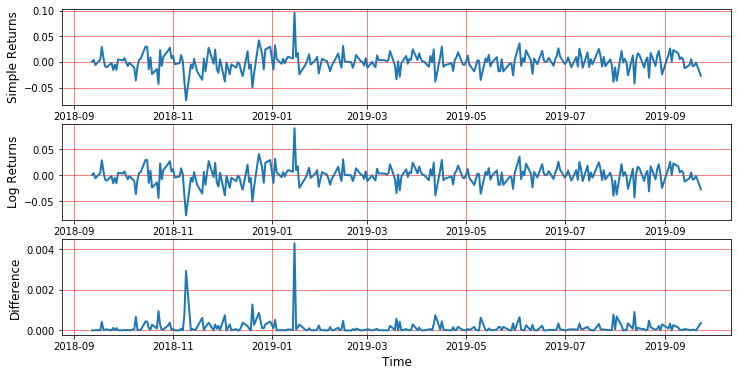

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 6))
fig.subplots_adjust(hspace=.2, wspace=.3)
axes[0].plot(simple_return_GS[1], linewidth = 2)
axes[1].plot(log_return_GS[1], linewidth = 2)
axes[2].plot(simple_return_GS[1] - log_return_GS[1], linewidth = 2)
axes[2].set_xlabel('Time', fontsize=12)
axes[0].set_ylabel('Simple Returns', fontsize=12)
axes[1].set_ylabel('Log Returns', fontsize=12)
axes[2].set_ylabel('Difference', fontsize=12)
for i in range(3):
    axes[i].grid(linestyle='-', linewidth='0.5', color='red')

## Application on a portfolio of GS, GOOG, and AAPL

In [11]:
stock_GS = download_stock_data("GS")
stock_GOOG = download_stock_data("GOOG")
stock_AAPL = download_stock_data("AAPL")

simple_return_GS = calculate_stock_return(stock_GS[0], "simple", stock_GS[1])
log_return_GS = calculate_stock_return(stock_GS[0], "log", stock_GS[1]) 
simple_return_GOOG = calculate_stock_return(stock_GOOG[0], "simple", stock_GOOG[1])
log_return_GOOG = calculate_stock_return(stock_GOOG[0], "log", stock_GOOG[1])
simple_return_AAPL = calculate_stock_return(stock_AAPL[0], "simple", stock_AAPL[1])
log_return_AAPL = calculate_stock_return(stock_AAPL[0], "log", stock_AAPL[1])

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


##### Calculating Returns

In [12]:
simple = [simple_return_GS, simple_return_GOOG, simple_return_AAPL]
log = [log_return_GS, log_return_GOOG, log_return_AAPL]

##### Calculating Standard Deviation

In [13]:
std_dev_simple = [standard_deviation(stock[1]) for stock in simple]
std_dev_log = [standard_deviation(stock[1]) for stock in log]
print(std_dev_simple, std_dev_log)

[0.0174759861851394, 0.01826404067545584, 0.020043337768029496] [0.017481954970368623, 0.01823054267017098, 0.02017545023896378]


##### Calculating semivariance

In [14]:
semivar_simple = [semi_variance(stock[1]) for stock in simple]
semivar_log = [semi_variance(stock[1]) for stock in log]
print(semivar_simple, semivar_log)

[0.0001473140523583097, 0.00016784798186472282, 0.00017525297216067857] [0.00014350518862657556, 0.00016187155691758804, 0.00017196244273322522]


##### Calculating Value at Risk

In [15]:
var_simple = [value_at_risk(0.01, stock[1]) for stock in simple]
var_log = [value_at_risk(0.01, stock[1]) for stock in log]
print(var_simple, var_log)

[-0.04232053663049964, -0.05039427519195436, -0.05475908474260627] [-0.04324227642436307, -0.051708420705281616, -0.05631993770170313]


##### Calculating ES/CVaR

In [16]:
cvar_simple = [expected_shortfall(0.01, stock[1]) for stock in simple]
cvar_log = [expected_shortfall(0.01, stock[1]) for stock in log]
print(cvar_simple, cvar_log)

[-0.055701573488734425, -0.06287198430470287, -0.07466017547315192] [-0.057417543171843256, -0.06500251101322292, -0.07778368009949184]


##### Graphic representation of Results

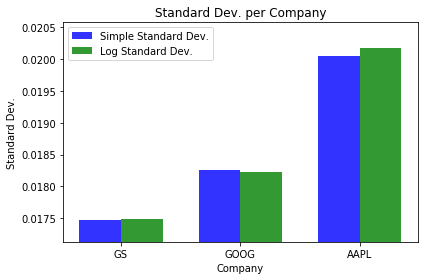

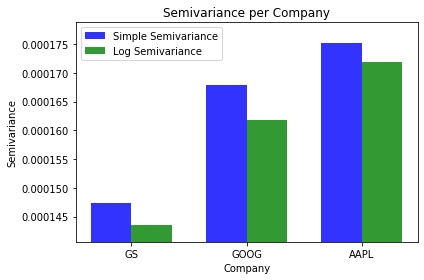

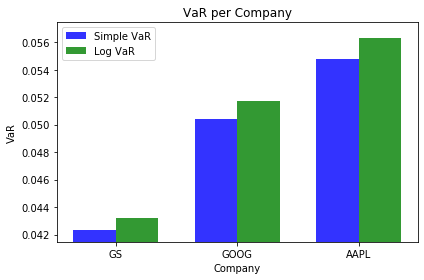

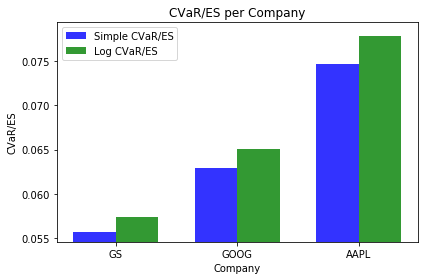

In [17]:
# data to plot

n_groups = 3
simple = []
log = []

simple.append([(std_dev_simple[0], std_dev_simple[1], std_dev_simple[2]), "Standard Dev."])
log.append([(std_dev_log[0], std_dev_log[1], std_dev_log[2])])

simple.append([(semivar_simple[0], semivar_simple[1], semivar_simple[2]), "Semivariance"])
log.append([(semivar_log[0], semivar_log[1], semivar_log[2])])

simple.append([tuple(-1*x for x in (var_simple[0], var_simple[1], var_simple[2])), "VaR"])
log.append([tuple(-1*x for x in (var_log[0], var_log[1], var_log[2]))])

simple.append([tuple(-1*x for x in (cvar_simple[0], cvar_simple[1], cvar_simple[2])), "CVaR/ES"])
log.append([tuple(-1*x for x in (cvar_log[0], cvar_log[1], cvar_log[2]))])

for i in range(4):
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.8
    
    rects1 = plt.bar(index, simple[i][0], bar_width,
                     alpha=opacity,
                     color='b',
                     label='Simple ' + simple[i][1])

    rects2 = plt.bar(index + bar_width, log[i][0], bar_width,
                     alpha=opacity,
                     color='g',
                     label='Log ' + simple[i][1])
    
    plt.xlabel('Company')
    plt.ylabel(simple[i][1])
    plt.ylim(min(simple[i][0] + log[i][0])*0.98, max(simple[i][0] + log[i][0])*1.02)
    plt.title(simple[i][1] + ' per Company')
    plt.xticks(index + bar_width/2, ('GS', 'GOOG', 'AAPL'))
    plt.legend()

    plt.tight_layout()
    plt.show()